In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-24       2907      51       2547
new  confirmed
      68.0


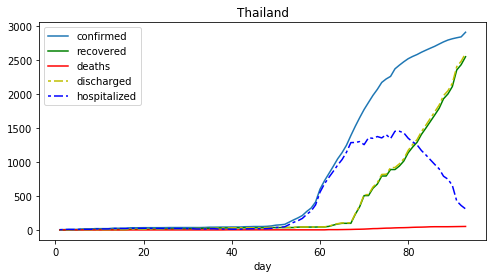

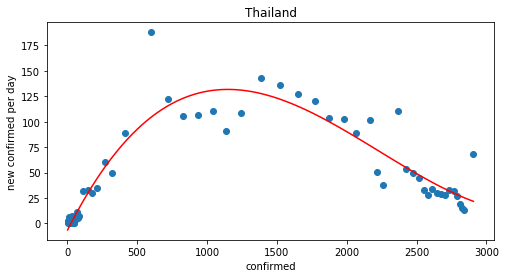

discharged:  2598
deaths:  51
%:  1.9630484988452657


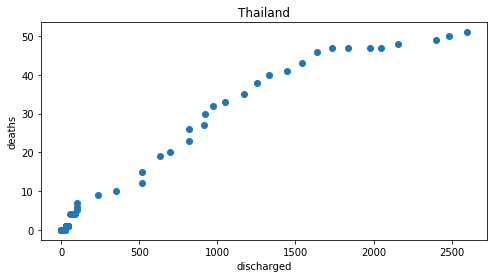

      date  confirmed  deaths  recovered
 2020-4-24       5691      96       3663
new  confirmed
      88.0


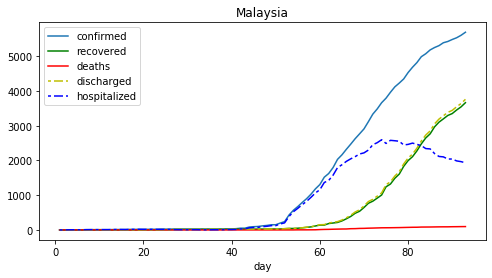

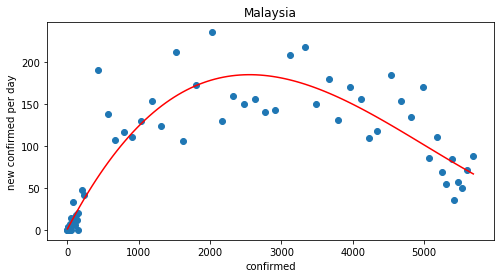

discharged:  3759
deaths:  96
%:  2.5538707102952913


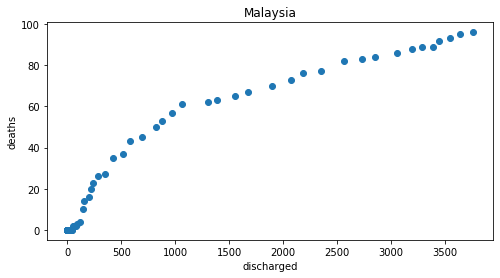

      date  confirmed  deaths  recovered
 2020-4-24      12075      12        956
new  confirmed
     897.0


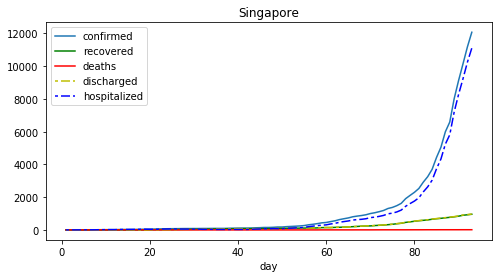

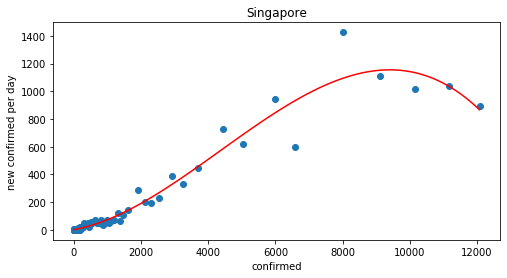

discharged:  968
deaths:  12
%:  1.2396694214876034


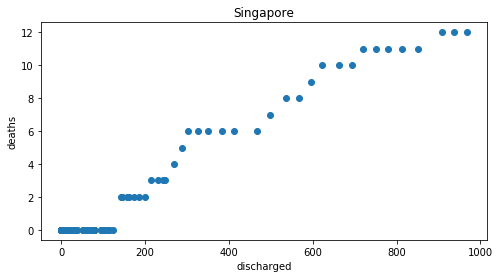

      date  confirmed  deaths  recovered
 2020-4-24       8211     689       1002
new  confirmed
     436.0


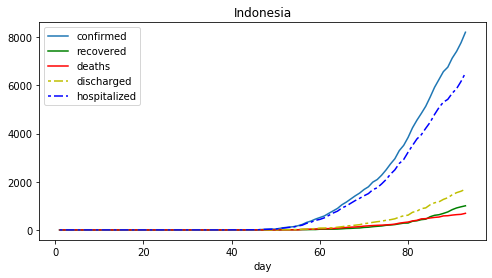

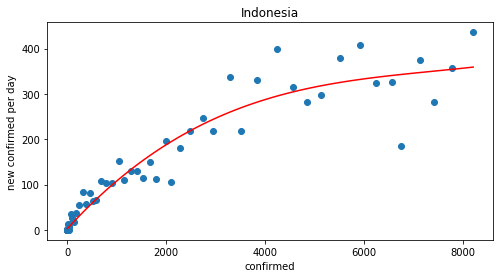

discharged:  1691
deaths:  689
%:  40.7451212300414


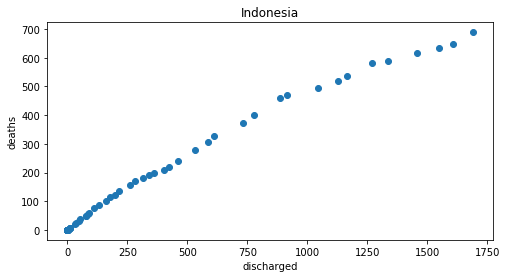

      date  confirmed  deaths  recovered
 2020-4-24     905358   51949      99079
new  confirmed
   36188.0


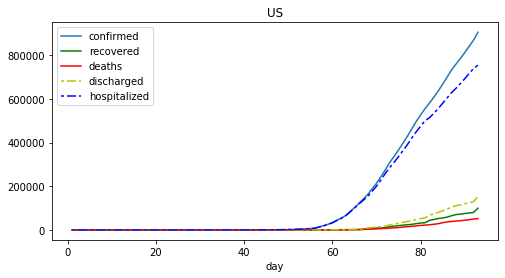

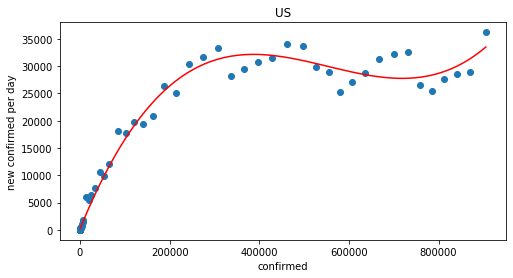

discharged:  151028
deaths:  51949
%:  34.39693301904283


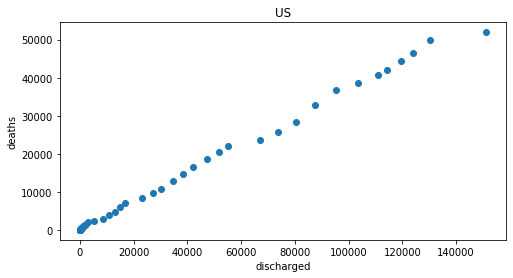

      date  confirmed  deaths  recovered
 2020-4-24      83899    4636      78109
new  confirmed
      15.0


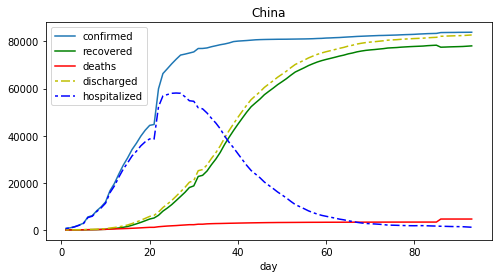

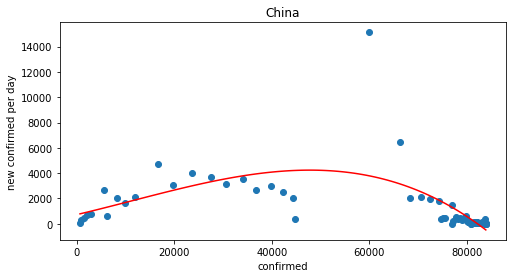

discharged:  82745
deaths:  4636
%:  5.602755453501722


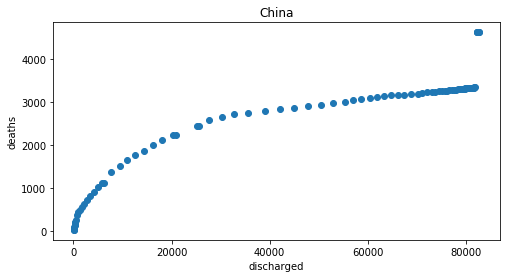

      date  confirmed  deaths  recovered
 2020-4-24      10718     240       8635
new  confirmed
      10.0


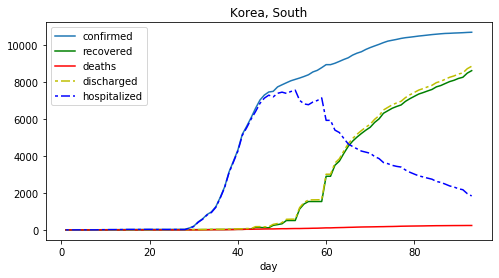

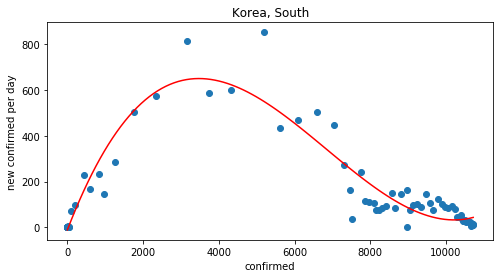

discharged:  8875
deaths:  240
%:  2.704225352112676


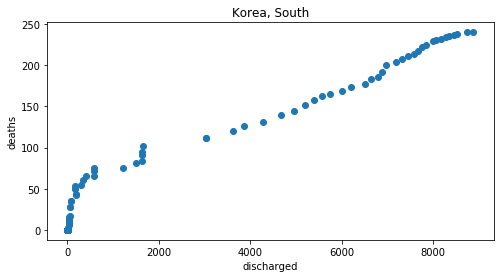

      date  confirmed  deaths  recovered
 2020-4-24     192994   25969      60498
new  confirmed
    3021.0


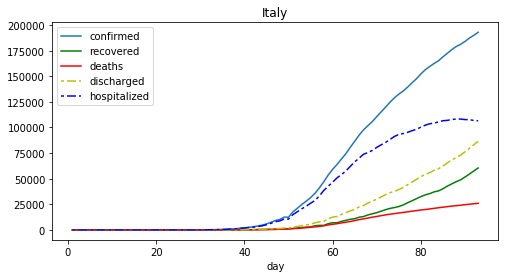

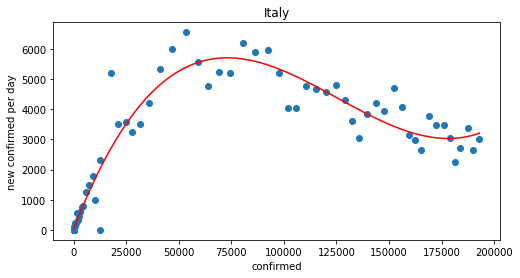

discharged:  86467
deaths:  25969
%:  30.03342315565476


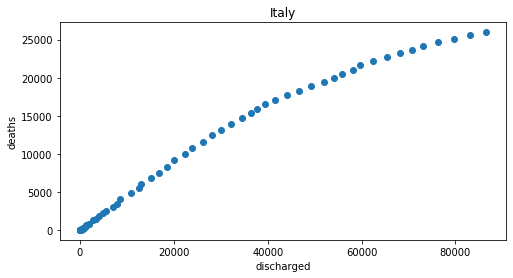

      date  confirmed  deaths  recovered
 2020-4-24     219764   22524      92355
new  confirmed
    6740.0


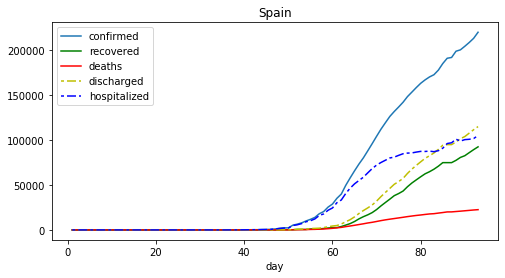

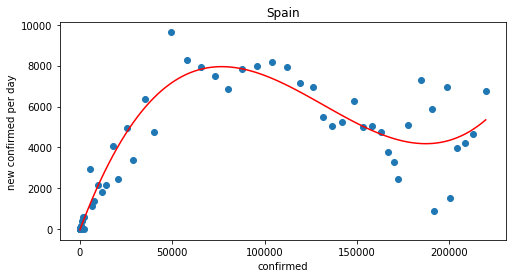

discharged:  114879
deaths:  22524
%:  19.606716632282662


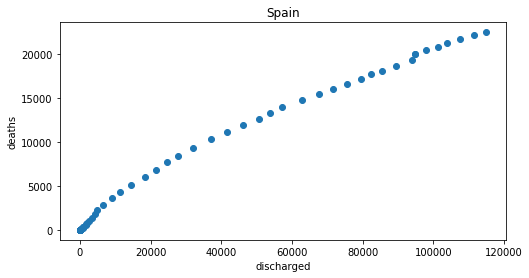

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
